In [1]:
import pandas as pd
import numpy as np

In [3]:
import pandas as pd

# 检查并输入正确的文件路径
file_path = '/Users/zhangrui/Desktop/data_modified001_副本.csv'  # 修改为正确的文件路径

try:
    merged_data = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError as e:
    print(f"File not found: {e}")

File loaded successfully.


In [4]:
merged_data

,stkcd,day,open_morning,close_morning,volume_morning,high_morning,low_morning,open_afternoon,close_afternoon,volume_afternoon,...,intraDSVol_byP_20d_mean,intraDSStd_byV_20d_mean,intraDSRtn_byV_20d_mean,avg_intraDSRtn_byT,intraDS2,intraDS2_final,cumulative_return,intraDSVol_byTN,intraDSVol_byPN,intraDS2Rtn_byVN
0,000001.XSHE,2022-12-01,1657.91,1635.61,1312148.0,1692.61,1626.93,1628.17,1623.22,305936.0,...,0.621854,0.733484,0.630902,0.734725,0.076025,0.000135,0.965909,0.000000,0.000000,0.000000
1,000001.XSHE,2022-12-02,1628.17,1579.85,910072.0,1629.41,1572.41,1602.15,1598.44,136144.0,...,0.680797,0.785536,0.742938,0.734725,0.075642,0.000134,1.000000,0.058943,0.058943,0.112036
2,000001.XSHE,2022-12-05,1621.98,1635.61,705372.0,1640.56,1612.07,1676.50,1676.50,379124.0,...,0.554141,0.740972,0.828229,0.734725,0.152339,0.000270,1.021209,-0.253312,-0.253312,0.170582
3,000001.XSHE,2022-12-06,1652.96,1670.30,653014.0,1680.22,1641.80,1656.67,1664.11,195782.0,...,0.550277,0.703255,0.721219,0.734725,0.294764,0.000523,0.997726,-0.011594,-0.011594,-0.321029
4,000001.XSHE,2022-12-07,1651.72,1631.89,394468.0,1656.67,1631.89,1623.22,1629.41,277266.0,...,0.475117,0.657538,0.776849,0.734725,0.152611,0.000271,1.007575,-0.300640,-0.300640,0.222519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,000010.XSHE,2024-08-16,23.00,22.47,316485.0,23.26,22.47,22.60,22.60,157264.0,...,0.381373,0.429422,0.779722,0.734725,0.152708,0.000271,0.011751,-0.045285,-0.045285,0.219844
3777,000010.XSHE,2024-08-19,22.73,22.60,345615.0,22.73,22.20,22.60,22.60,110321.0,...,0.391774,0.410366,0.779656,0.734725,0.152066,0.000270,0.011751,0.124294,0.124294,0.218599
3778,000010.XSHE,2024-08-20,22.60,22.60,365495.0,22.86,22.47,22.47,22.60,106704.0,...,0.392318,0.379046,0.779582,0.734725,0.152076,0.000270,0.011751,0.155737,0.155737,0.218693
3779,000010.XSHE,2024-08-21,22.47,22.60,193916.0,22.60,22.20,22.60,22.47,164132.0,...,0.379128,0.367315,0.779559,0.734725,0.152497,0.000271,0.011819,-0.295943,-0.295943,0.219575


In [5]:
print(merged_data.columns)

Index(['stkcd', 'day', 'open_morning', 'close_morning', 'volume_morning',
       'high_morning', 'low_morning', 'open_afternoon', 'close_afternoon',
       'volume_afternoon', 'high_afternoon', 'low_afternoon', 'rtn_morning',
       'rtn_afternoon', 'lh_rtnDiff', 'lh_volDiff', 'std_morning',
       'std_afternoon', 'lh_stdDiff', 'daily_return', 'volatility_morning',
       'volatility_afternoon', 'avg_volatility_morning',
       'avg_volatility_afternoon', 'intraDSRtn_byT', 'intraDSVol_byT',
       'intraDSStd_byP', 'intraDSVol_byP', 'intraDSStd_byV', 'intraDSRtn_byV',
       'intraDSRtn_byT_20d_mean', 'intraDSVol_byT_20d_mean',
       'intraDSStd_byP_20d_mean', 'intraDSVol_byP_20d_mean',
       'intraDSStd_byV_20d_mean', 'intraDSRtn_byV_20d_mean',
       'avg_intraDSRtn_byT', 'intraDS2', 'intraDS2_final', 'cumulative_return',
       'intraDSVol_byTN', 'intraDSVol_byPN', 'intraDS2Rtn_byVN'],
      dtype='object')


**4、分域信息特异性因子：股票间显著性**

In [5]:
import pandas as pd
import numpy as np

# 假设 merged_data 已经加载并包含分域数据
# 我们将选取相关的分域特征列，用于标准化和相似度计算
domain_features = [
    'intraDSVol_byT', 'intraDSRtn_byT', 'intraDSStd_byP', 
    'intraDSVol_byP', 'intraDSRtn_byV', 'intraDSStd_byV'
]

# 选取用于相似度计算的特征数据
qcutCHR_data = merged_data[['stkcd', 'day'] + domain_features]

# 步骤2: 分域标准化
def standardize(data):
    """标准化数据，按列进行处理"""
    return (data - data.mean(axis=0)) / data.std(axis=0)

# 对每个域进行标准化处理
qcutCHRSTD = qcutCHR_data.copy()
qcutCHRSTD[domain_features] = standardize(qcutCHR_data[domain_features])

# 步骤3: 股票间相似度刻画
# 计算股票之间的相似度（皮尔逊相关系数）
def calc_similarity(stock_a_data, stock_b_data):
    # 只计算两个股票共同的日期的数据
    common_days = stock_a_data['day'].isin(stock_b_data['day'])
    stock_a_common = stock_a_data[common_days].sort_values('day')
    stock_b_common = stock_b_data[stock_b_data['day'].isin(stock_a_data['day'])].sort_values('day')
    
    # 如果没有共同数据点，返回 NaN
    if stock_a_common.empty or stock_b_common.empty or stock_a_common.shape[0] != stock_b_common.shape[0]:
        return np.nan

    similarity_list = []
    for domain in domain_features:  # 遍历每个域
        corr_coef = np.corrcoef(stock_a_common[domain], stock_b_common[domain])[0, 1]
        similarity_list.append(corr_coef)
    
    return np.mean(similarity_list)  # 取均值作为最终相似度

# 创建股票列表
stkcd_list = merged_data['stkcd'].unique()
num_stocks = len(stkcd_list)

# 计算所有股票之间的相似度矩阵
similarity_matrix = np.zeros((num_stocks, num_stocks))

for i in range(num_stocks):
    for j in range(i, num_stocks):
        # 根据 'stkcd' 筛选对应股票的数据
        stock_a_data = qcutCHRSTD[qcutCHRSTD['stkcd'] == stkcd_list[i]]
        stock_b_data = qcutCHRSTD[qcutCHRSTD['stkcd'] == stkcd_list[j]]
        
        # 计算相似度并填充矩阵
        similarity_matrix[i, j] = calc_similarity(stock_a_data, stock_b_data)
        similarity_matrix[j, i] = similarity_matrix[i, j]  # 对称矩阵

# 将相似度矩阵转换为 DataFrame
similarity_df = pd.DataFrame(similarity_matrix, columns=stkcd_list, index=stkcd_list)

# 输出相似度矩阵
print(similarity_df)

             000001.XSHE  000002.XSHE  000004.XSHE  000005.XSHE  000006.XSHE  \
000001.XSHE     1.000000     0.287054     0.025688     0.080998     0.105915   
000002.XSHE     0.287054     1.000000     0.069098    -0.039178     0.270577   
000004.XSHE     0.025688     0.069098     1.000000     0.010487    -0.009145   
000005.XSHE     0.080998    -0.039178     0.010487     1.000000     0.056554   
000006.XSHE     0.105915     0.270577    -0.009145     0.056554     1.000000   
000007.XSHE    -0.049066    -0.001000    -0.000861     0.000477     0.004248   
000008.XSHE     0.024933     0.100632     0.060485    -0.077262     0.018098   
000009.XSHE     0.070556     0.117582     0.043233     0.055423     0.089069   
000010.XSHE     0.071655     0.070312     0.079591    -0.065815     0.060007   

             000007.XSHE  000008.XSHE  000009.XSHE  000010.XSHE  
000001.XSHE    -0.049066     0.024933     0.070556     0.071655  
000002.XSHE    -0.001000     0.100632     0.117582     0.070312  
0

### 4.3

In [6]:
merged_data

,stkcd,day,open_morning,close_morning,volume_morning,high_morning,low_morning,open_afternoon,close_afternoon,volume_afternoon,...,intraDSVol_byP_20d_mean,intraDSStd_byV_20d_mean,intraDSRtn_byV_20d_mean,avg_intraDSRtn_byT,intraDS2,intraDS2_final,cumulative_return,intraDSVol_byTN,intraDSVol_byPN,intraDS2Rtn_byVN
0,000001.XSHE,2022-12-01,1657.91,1635.61,1312148.0,1692.61,1626.93,1628.17,1623.22,305936.0,...,0.621854,0.733484,0.630902,0.734725,0.076025,0.000135,0.965909,0.000000,0.000000,0.000000
1,000001.XSHE,2022-12-02,1628.17,1579.85,910072.0,1629.41,1572.41,1602.15,1598.44,136144.0,...,0.680797,0.785536,0.742938,0.734725,0.075642,0.000134,1.000000,0.058943,0.058943,0.112036
2,000001.XSHE,2022-12-05,1621.98,1635.61,705372.0,1640.56,1612.07,1676.50,1676.50,379124.0,...,0.554141,0.740972,0.828229,0.734725,0.152339,0.000270,1.021209,-0.253312,-0.253312,0.170582
3,000001.XSHE,2022-12-06,1652.96,1670.30,653014.0,1680.22,1641.80,1656.67,1664.11,195782.0,...,0.550277,0.703255,0.721219,0.734725,0.294764,0.000523,0.997726,-0.011594,-0.011594,-0.321029
4,000001.XSHE,2022-12-07,1651.72,1631.89,394468.0,1656.67,1631.89,1623.22,1629.41,277266.0,...,0.475117,0.657538,0.776849,0.734725,0.152611,0.000271,1.007575,-0.300640,-0.300640,0.222519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,000010.XSHE,2024-08-16,23.00,22.47,316485.0,23.26,22.47,22.60,22.60,157264.0,...,0.381373,0.429422,0.779722,0.734725,0.152708,0.000271,0.011751,-0.045285,-0.045285,0.219844
3777,000010.XSHE,2024-08-19,22.73,22.60,345615.0,22.73,22.20,22.60,22.60,110321.0,...,0.391774,0.410366,0.779656,0.734725,0.152066,0.000270,0.011751,0.124294,0.124294,0.218599
3778,000010.XSHE,2024-08-20,22.60,22.60,365495.0,22.86,22.47,22.47,22.60,106704.0,...,0.392318,0.379046,0.779582,0.734725,0.152076,0.000270,0.011751,0.155737,0.155737,0.218693
3779,000010.XSHE,2024-08-21,22.47,22.60,193916.0,22.60,22.20,22.60,22.47,164132.0,...,0.379128,0.367315,0.779559,0.734725,0.152497,0.000271,0.011819,-0.295943,-0.295943,0.219575


In [7]:
print(merged_data.columns)

Index(['stkcd', 'day', 'open_morning', 'close_morning', 'volume_morning',
       'high_morning', 'low_morning', 'open_afternoon', 'close_afternoon',
       'volume_afternoon', 'high_afternoon', 'low_afternoon', 'rtn_morning',
       'rtn_afternoon', 'lh_rtnDiff', 'lh_volDiff', 'std_morning',
       'std_afternoon', 'lh_stdDiff', 'daily_return', 'volatility_morning',
       'volatility_afternoon', 'avg_volatility_morning',
       'avg_volatility_afternoon', 'intraDSRtn_byT', 'intraDSVol_byT',
       'intraDSStd_byP', 'intraDSVol_byP', 'intraDSStd_byV', 'intraDSRtn_byV',
       'intraDSRtn_byT_20d_mean', 'intraDSVol_byT_20d_mean',
       'intraDSStd_byP_20d_mean', 'intraDSVol_byP_20d_mean',
       'intraDSStd_byV_20d_mean', 'intraDSRtn_byV_20d_mean',
       'avg_intraDSRtn_byT', 'intraDS2', 'intraDS2_final', 'cumulative_return',
       'intraDSVol_byTN', 'intraDSVol_byPN', 'intraDS2Rtn_byVN'],
      dtype='object')


### 4.5

In [8]:
import pandas as pd
import numpy as np

# 选取相关的域特征列
domain_features = [
    'intraDSVol_byT', 'intraDSRtn_byT', 'intraDSStd_byP', 
    'intraDSVol_byP', 'intraDSRtn_byV', 'intraDSStd_byV'
]

# 选取用于相似度计算的特征数据
qcutCHR_data = merged_data[['stkcd', 'day'] + domain_features]

# 标准化函数
def standardize(data):
    """标准化数据，按列进行处理"""
    return (data - data.mean(axis=0)) / data.std(axis=0)

# 对每个域进行标准化处理
qcutCHRSTD = qcutCHR_data.copy()
qcutCHRSTD[domain_features] = standardize(qcutCHR_data[domain_features])

# 股票间相似度刻画函数
def calc_similarity(stock_a_data, stock_b_data):
    # 只计算两个股票共同的日期的数据
    common_days = stock_a_data['day'].isin(stock_b_data['day'])
    stock_a_common = stock_a_data[common_days].sort_values('day')
    stock_b_common = stock_b_data[stock_b_data['day'].isin(stock_a_data['day'])].sort_values('day')
    
    # 如果没有共同数据点，返回 NaN
    if stock_a_common.empty or stock_b_common.empty or stock_a_common.shape[0] != stock_b_common.shape[0]:
        return np.nan

    similarity_list = []
    for domain in domain_features:  # 遍历每个域
        corr_coef = np.corrcoef(stock_a_common[domain], stock_b_common[domain])[0, 1]
        similarity_list.append(corr_coef)
    
    return np.mean(similarity_list)  # 取均值作为最终相似度

# 创建股票列表
stkcd_list = merged_data['stkcd'].unique()
num_stocks = len(stkcd_list)

# 计算所有股票之间的相似度矩阵
similarity_matrix = np.zeros((num_stocks, num_stocks))

for i in range(num_stocks):
    for j in range(i, num_stocks):
        # 根据 'stkcd' 筛选对应股票的数据
        stock_a_data = qcutCHRSTD[qcutCHRSTD['stkcd'] == stkcd_list[i]]
        stock_b_data = qcutCHRSTD[qcutCHRSTD['stkcd'] == stkcd_list[j]]
        
        # 计算相似度并填充矩阵
        similarity_matrix[i, j] = calc_similarity(stock_a_data, stock_b_data)
        similarity_matrix[j, i] = similarity_matrix[i, j]  # 对称矩阵

# 将相似度矩阵转换为 DataFrame
similarity_df = pd.DataFrame(similarity_matrix, columns=stkcd_list, index=stkcd_list)

# 输出相似度矩阵
print(similarity_df)

             000001.XSHE  000002.XSHE  000004.XSHE  000005.XSHE  000006.XSHE  \
000001.XSHE     1.000000     0.287054     0.025688     0.080998     0.105915   
000002.XSHE     0.287054     1.000000     0.069098    -0.039178     0.270577   
000004.XSHE     0.025688     0.069098     1.000000     0.010487    -0.009145   
000005.XSHE     0.080998    -0.039178     0.010487     1.000000     0.056554   
000006.XSHE     0.105915     0.270577    -0.009145     0.056554     1.000000   
000007.XSHE    -0.049066    -0.001000    -0.000861     0.000477     0.004248   
000008.XSHE     0.024933     0.100632     0.060485    -0.077262     0.018098   
000009.XSHE     0.070556     0.117582     0.043233     0.055423     0.089069   
000010.XSHE     0.071655     0.070312     0.079591    -0.065815     0.060007   

             000007.XSHE  000008.XSHE  000009.XSHE  000010.XSHE  
000001.XSHE    -0.049066     0.024933     0.070556     0.071655  
000002.XSHE    -0.001000     0.100632     0.117582     0.070312  
0

In [9]:
merged_data

,stkcd,day,open_morning,close_morning,volume_morning,high_morning,low_morning,open_afternoon,close_afternoon,volume_afternoon,...,intraDSVol_byP_20d_mean,intraDSStd_byV_20d_mean,intraDSRtn_byV_20d_mean,avg_intraDSRtn_byT,intraDS2,intraDS2_final,cumulative_return,intraDSVol_byTN,intraDSVol_byPN,intraDS2Rtn_byVN
0,000001.XSHE,2022-12-01,1657.91,1635.61,1312148.0,1692.61,1626.93,1628.17,1623.22,305936.0,...,0.621854,0.733484,0.630902,0.734725,0.076025,0.000135,0.965909,0.000000,0.000000,0.000000
1,000001.XSHE,2022-12-02,1628.17,1579.85,910072.0,1629.41,1572.41,1602.15,1598.44,136144.0,...,0.680797,0.785536,0.742938,0.734725,0.075642,0.000134,1.000000,0.058943,0.058943,0.112036
2,000001.XSHE,2022-12-05,1621.98,1635.61,705372.0,1640.56,1612.07,1676.50,1676.50,379124.0,...,0.554141,0.740972,0.828229,0.734725,0.152339,0.000270,1.021209,-0.253312,-0.253312,0.170582
3,000001.XSHE,2022-12-06,1652.96,1670.30,653014.0,1680.22,1641.80,1656.67,1664.11,195782.0,...,0.550277,0.703255,0.721219,0.734725,0.294764,0.000523,0.997726,-0.011594,-0.011594,-0.321029
4,000001.XSHE,2022-12-07,1651.72,1631.89,394468.0,1656.67,1631.89,1623.22,1629.41,277266.0,...,0.475117,0.657538,0.776849,0.734725,0.152611,0.000271,1.007575,-0.300640,-0.300640,0.222519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,000010.XSHE,2024-08-16,23.00,22.47,316485.0,23.26,22.47,22.60,22.60,157264.0,...,0.381373,0.429422,0.779722,0.734725,0.152708,0.000271,0.011751,-0.045285,-0.045285,0.219844
3777,000010.XSHE,2024-08-19,22.73,22.60,345615.0,22.73,22.20,22.60,22.60,110321.0,...,0.391774,0.410366,0.779656,0.734725,0.152066,0.000270,0.011751,0.124294,0.124294,0.218599
3778,000010.XSHE,2024-08-20,22.60,22.60,365495.0,22.86,22.47,22.47,22.60,106704.0,...,0.392318,0.379046,0.779582,0.734725,0.152076,0.000270,0.011751,0.155737,0.155737,0.218693
3779,000010.XSHE,2024-08-21,22.47,22.60,193916.0,22.60,22.20,22.60,22.47,164132.0,...,0.379128,0.367315,0.779559,0.734725,0.152497,0.000271,0.011819,-0.295943,-0.295943,0.219575


In [10]:
print(merged_data.columns)

Index(['stkcd', 'day', 'open_morning', 'close_morning', 'volume_morning',
       'high_morning', 'low_morning', 'open_afternoon', 'close_afternoon',
       'volume_afternoon', 'high_afternoon', 'low_afternoon', 'rtn_morning',
       'rtn_afternoon', 'lh_rtnDiff', 'lh_volDiff', 'std_morning',
       'std_afternoon', 'lh_stdDiff', 'daily_return', 'volatility_morning',
       'volatility_afternoon', 'avg_volatility_morning',
       'avg_volatility_afternoon', 'intraDSRtn_byT', 'intraDSVol_byT',
       'intraDSStd_byP', 'intraDSVol_byP', 'intraDSStd_byV', 'intraDSRtn_byV',
       'intraDSRtn_byT_20d_mean', 'intraDSVol_byT_20d_mean',
       'intraDSStd_byP_20d_mean', 'intraDSVol_byP_20d_mean',
       'intraDSStd_byV_20d_mean', 'intraDSRtn_byV_20d_mean',
       'avg_intraDSRtn_byT', 'intraDS2', 'intraDS2_final', 'cumulative_return',
       'intraDSVol_byTN', 'intraDSVol_byPN', 'intraDS2Rtn_byVN'],
      dtype='object')


In [14]:
import pandas as pd
import numpy as np

# 假设 merged_data 已经包含 'intraDSVol_byTN', 'intraDSVol_byPN', 'intraDS2Rtn_byVN'
factor_columns = ['intraDSVol_byTN', 'intraDSVol_byPN', 'intraDS2Rtn_byVN']

# 初始化 Rank IC 结果数据框
ic_results = pd.DataFrame(index=factor_columns, columns=['IC均值', 'IC标准差', 'ICIR', 'T统计量'])

# 计算每个因子的 Rank IC
for factor in factor_columns:
    daily_ic = []
    print(f"Processing factor: {factor}")  # 打印当前处理的因子名称
    for day, group in merged_data.groupby('day'):
        if group[factor].dtype == 'float64':  # 确保因子列是 float 类型
            # 打印当前分组的基本统计信息
            print(f"Processing day: {day}, factor: {factor}")
            print(f"Factor {factor} - min: {group[factor].min()}, max: {group[factor].max()}, std: {group[factor].std()}")
            print(f"daily_return - min: {group['daily_return'].min()}, max: {group['daily_return'].max()}, std: {group['daily_return'].std()}")
            
            # 检查该因子的标准差是否为零（即所有值是否相同）
            if group[factor].std() == 0 or group['daily_return'].std() == 0:
                print(f"Skipping day {day} due to constant input.")
                continue  # 如果标准差为零，跳过相关性计算
            
            # 仅在存在非 NaN 值时计算 Rank IC
            if group[factor].notna().sum() > 0 and group['daily_return'].notna().sum() > 0:
                # 尝试使用 Pearson 相关系数
                ic = group[factor].corr(group['daily_return'], method='pearson')
                daily_ic.append(ic)
                print(f"IC on day {day}: {ic}")
    
    # 确保存在有效数据进行计算
    if len(daily_ic) > 0:
        ic_mean = np.mean(daily_ic)
        ic_std = np.std(daily_ic)
        ic_ir = ic_mean / ic_std if ic_std != 0 else np.nan
        t_stat = ic_mean / (ic_std / np.sqrt(len(daily_ic))) if ic_std != 0 else np.nan

        ic_results.loc[factor, 'IC均值'] = ic_mean
        ic_results.loc[factor, 'IC标准差'] = ic_std
        ic_results.loc[factor, 'ICIR'] = ic_ir
        ic_results.loc[factor, 'T统计量'] = t_stat
    else:
        ic_results.loc[factor, 'IC均值'] = np.nan
        ic_results.loc[factor, 'IC标准差'] = np.nan
        ic_results.loc[factor, 'ICIR'] = np.nan
        ic_results.loc[factor, 'T统计量'] = np.nan

# 输出 Rank IC 结果
print("自身显著性因子 Rank IC 测试结果")
print(ic_results)

Processing factor: intraDSVol_byTN
Processing day: 2022-12-01, factor: intraDSVol_byTN
Factor intraDSVol_byTN - min: 0.0, max: 0.0, std: 0.0
daily_return - min: -0.0503705415353127, max: 0.0778820994305062, std: 0.036000570335681395
Skipping day 2022-12-01 due to constant input.
Processing day: 2022-12-02, factor: intraDSVol_byTN
Factor intraDSVol_byTN - min: -0.2602037476991112, max: 0.1826114182193725, std: 0.1526513834762752
daily_return - min: -0.0123041650745127, max: 0.0804029533224877, std: 0.028590924356673597
IC on day 2022-12-02: 0.15727439251611358
Processing day: 2022-12-05, factor: intraDSVol_byTN
Factor intraDSVol_byTN - min: -0.2533119605908379, max: 0.2148422279961432, std: 0.1544440945701523
daily_return - min: -0.2214765100671141, max: 0.0608782435129742, std: 0.08459702994771137
IC on day 2022-12-05: 0.4696161727540272
Processing day: 2022-12-06, factor: intraDSVol_byTN
Factor intraDSVol_byTN - min: -0.2374753731023053, max: 0.4598594590725784, std: 0.199881344171249

/Users/zhangrui/opt/anaconda3/envs/suishi/lib/python3.8/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/zhangrui/opt/anaconda3/envs/suishi/lib/python3.8/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/zhangrui/opt/anaconda3/envs/suishi/lib/python3.8/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/zhangrui/opt/anaconda3/envs/suishi/lib/python3.8/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


IC on day 2024-08-23: nan
Processing factor: intraDSVol_byPN
Processing day: 2022-12-01, factor: intraDSVol_byPN
Factor intraDSVol_byPN - min: 0.0, max: 0.0, std: 0.0
daily_return - min: -0.0503705415353127, max: 0.0778820994305062, std: 0.036000570335681395
Skipping day 2022-12-01 due to constant input.
Processing day: 2022-12-02, factor: intraDSVol_byPN
Factor intraDSVol_byPN - min: -0.2602037476991112, max: 0.1826114182193725, std: 0.1526513834762752
daily_return - min: -0.0123041650745127, max: 0.0804029533224877, std: 0.028590924356673597
IC on day 2022-12-02: 0.15727439251611358
Processing day: 2022-12-05, factor: intraDSVol_byPN
Factor intraDSVol_byPN - min: -0.2533119605908379, max: 0.2148422279961432, std: 0.1544440945701523
daily_return - min: -0.2214765100671141, max: 0.0608782435129742, std: 0.08459702994771137
IC on day 2022-12-05: 0.4696161727540272
Processing day: 2022-12-06, factor: intraDSVol_byPN
Factor intraDSVol_byPN - min: -0.2374753731023053, max: 0.45985945907257

/Users/zhangrui/opt/anaconda3/envs/suishi/lib/python3.8/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/zhangrui/opt/anaconda3/envs/suishi/lib/python3.8/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [15]:
import pandas as pd
import numpy as np

# 假设 merged_data 已经包含 'intraDSVol_byTN', 'intraDSVol_byPN', 'intraDS2Rtn_byVN'
factor_columns = ['intraDSVol_byTN', 'intraDSVol_byPN', 'intraDS2Rtn_byVN']

# 初始化 Rank IC 结果数据框
ic_results = pd.DataFrame(index=factor_columns, columns=['IC均值', 'IC标准差', 'ICIR', 'T统计量'])

# 计算每个因子的 Rank IC
for factor in factor_columns:
    daily_ic = []
    print(f"Processing factor: {factor}")  # 打印当前处理的因子名称
    for day, group in merged_data.groupby('day'):
        if group[factor].dtype == 'float64':  # 确保因子列是 float 类型
            # 打印当前分组的基本统计信息
            print(f"Processing day: {day}, factor: {factor}")
            print(f"Factor {factor} - min: {group[factor].min()}, max: {group[factor].max()}, std: {group[factor].std()}")
            print(f"daily_return - min: {group['daily_return'].min()}, max: {group['daily_return'].max()}, std: {group['daily_return'].std()}")

            # 删除 NaN 值并重新检查标准差
            factor_data = group[[factor, 'daily_return']].dropna()
            if factor_data.empty:
                print(f"Skipping day {day} due to empty data after NaN removal.")
                continue

            factor_std = factor_data[factor].std()
            daily_return_std = factor_data['daily_return'].std()
            if factor_std == 0 or daily_return_std == 0:
                print(f"Skipping day {day} due to constant input after NaN removal.")
                continue  # 如果标准差为零，跳过相关性计算

            # 计算 Pearson 相关系数
            try:
                ic = factor_data[factor].corr(factor_data['daily_return'], method='pearson')
                print(f"IC on day {day}: {ic}")
                daily_ic.append(ic)
            except Exception as e:
                print(f"Error calculating correlation on day {day}: {e}")

    # 确保存在有效数据进行计算
    if len(daily_ic) > 0:
        ic_mean = np.mean(daily_ic)
        ic_std = np.std(daily_ic)
        ic_ir = ic_mean / ic_std if ic_std != 0 else np.nan
        t_stat = ic_mean / (ic_std / np.sqrt(len(daily_ic))) if ic_std != 0 else np.nan

        ic_results.loc[factor, 'IC均值'] = ic_mean
        ic_results.loc[factor, 'IC标准差'] = ic_std
        ic_results.loc[factor, 'ICIR'] = ic_ir
        ic_results.loc[factor, 'T统计量'] = t_stat
    else:
        ic_results.loc[factor, 'IC均值'] = np.nan
        ic_results.loc[factor, 'IC标准差'] = np.nan
        ic_results.loc[factor, 'ICIR'] = np.nan
        ic_results.loc[factor, 'T统计量'] = np.nan

# 输出 Rank IC 结果
print("自身显著性因子 Rank IC 测试结果")
print(ic_results)

Processing factor: intraDSVol_byTN
Processing day: 2022-12-01, factor: intraDSVol_byTN
Factor intraDSVol_byTN - min: 0.0, max: 0.0, std: 0.0
daily_return - min: -0.0503705415353127, max: 0.0778820994305062, std: 0.036000570335681395
Skipping day 2022-12-01 due to constant input after NaN removal.
Processing day: 2022-12-02, factor: intraDSVol_byTN
Factor intraDSVol_byTN - min: -0.2602037476991112, max: 0.1826114182193725, std: 0.1526513834762752
daily_return - min: -0.0123041650745127, max: 0.0804029533224877, std: 0.028590924356673597
IC on day 2022-12-02: 0.15727439251611358
Processing day: 2022-12-05, factor: intraDSVol_byTN
Factor intraDSVol_byTN - min: -0.2533119605908379, max: 0.2148422279961432, std: 0.1544440945701523
daily_return - min: -0.2214765100671141, max: 0.0608782435129742, std: 0.08459702994771137
IC on day 2022-12-05: 0.4696161727540272
Processing day: 2022-12-06, factor: intraDSVol_byTN
Factor intraDSVol_byTN - min: -0.2374753731023053, max: 0.4598594590725784, std:

/Users/zhangrui/opt/anaconda3/envs/suishi/lib/python3.8/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/zhangrui/opt/anaconda3/envs/suishi/lib/python3.8/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


IC on day 2023-04-04: 0.6027625980413823
Processing day: 2023-04-06, factor: intraDSVol_byPN
Factor intraDSVol_byPN - min: -0.301280733635297, max: 0.2414171509347685, std: 0.15186914514539487
daily_return - min: -0.0092653150207105, max: 0.0309851640572096, std: 0.013281811261777146
IC on day 2023-04-06: 0.16930073356819594
Processing day: 2023-04-07, factor: intraDSVol_byPN
Factor intraDSVol_byPN - min: -0.2966300676918125, max: 0.3901721153515519, std: 0.23229031963395969
daily_return - min: -0.0232486881918111, max: 0.0146137787056368, std: 0.010574566951695478
IC on day 2023-04-07: -0.7073337139328707
Processing day: 2023-04-10, factor: intraDSVol_byPN
Factor intraDSVol_byPN - min: -0.2676129543940036, max: 0.4085146464249963, std: 0.1973027936349881
daily_return - min: -0.0343249427917621, max: 0.0158811073641282, std: 0.015168846379742524
IC on day 2023-04-10: 0.576086222362709
Processing day: 2023-04-11, factor: intraDSVol_byPN
Factor intraDSVol_byPN - min: -0.1196834688387777,

/Users/zhangrui/opt/anaconda3/envs/suishi/lib/python3.8/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/zhangrui/opt/anaconda3/envs/suishi/lib/python3.8/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


IC on day 2023-01-16: 0.5446414229092276
Processing day: 2023-01-17, factor: intraDS2Rtn_byVN
Factor intraDS2Rtn_byVN - min: -0.433684886249188, max: 0.2318357668767627, std: 0.2521157364636149
daily_return - min: -0.009009009009009, max: 0.0188838782412628, std: 0.009246253601042139
IC on day 2023-01-17: 0.33799820291710425
Processing day: 2023-01-18, factor: intraDS2Rtn_byVN
Factor intraDS2Rtn_byVN - min: -0.7646365316104016, max: 0.282091836994269, std: 0.4249779265140443
daily_return - min: -0.0220887171436621, max: 0.0156903765690377, std: 0.01080084684151307
IC on day 2023-01-18: -0.22332728866656482
Processing day: 2023-01-19, factor: intraDS2Rtn_byVN
Factor intraDS2Rtn_byVN - min: -0.7192343304764078, max: 0.2841958505741795, std: 0.36672234850510127
daily_return - min: -0.0092664092664093, max: 0.0184955141476881, std: 0.009797020486035014
IC on day 2023-01-19: 0.2732584864301407
Processing day: 2023-01-20, factor: intraDS2Rtn_byVN
Factor intraDS2Rtn_byVN - min: -0.78534063092

/Users/zhangrui/opt/anaconda3/envs/suishi/lib/python3.8/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/zhangrui/opt/anaconda3/envs/suishi/lib/python3.8/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [16]:
merged_data

,stkcd,day,open_morning,close_morning,volume_morning,high_morning,low_morning,open_afternoon,close_afternoon,volume_afternoon,...,intraDSVol_byP_20d_mean,intraDSStd_byV_20d_mean,intraDSRtn_byV_20d_mean,avg_intraDSRtn_byT,intraDS2,intraDS2_final,cumulative_return,intraDSVol_byTN,intraDSVol_byPN,intraDS2Rtn_byVN
0,000001.XSHE,2022-12-01,1657.91,1635.61,1312148.0,1692.61,1626.93,1628.17,1623.22,305936.0,...,0.621854,0.733484,0.630902,0.734725,0.076025,0.000135,0.965909,0.000000,0.000000,0.000000
1,000001.XSHE,2022-12-02,1628.17,1579.85,910072.0,1629.41,1572.41,1602.15,1598.44,136144.0,...,0.680797,0.785536,0.742938,0.734725,0.075642,0.000134,1.000000,0.058943,0.058943,0.112036
2,000001.XSHE,2022-12-05,1621.98,1635.61,705372.0,1640.56,1612.07,1676.50,1676.50,379124.0,...,0.554141,0.740972,0.828229,0.734725,0.152339,0.000270,1.021209,-0.253312,-0.253312,0.170582
3,000001.XSHE,2022-12-06,1652.96,1670.30,653014.0,1680.22,1641.80,1656.67,1664.11,195782.0,...,0.550277,0.703255,0.721219,0.734725,0.294764,0.000523,0.997726,-0.011594,-0.011594,-0.321029
4,000001.XSHE,2022-12-07,1651.72,1631.89,394468.0,1656.67,1631.89,1623.22,1629.41,277266.0,...,0.475117,0.657538,0.776849,0.734725,0.152611,0.000271,1.007575,-0.300640,-0.300640,0.222519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,000010.XSHE,2024-08-16,23.00,22.47,316485.0,23.26,22.47,22.60,22.60,157264.0,...,0.381373,0.429422,0.779722,0.734725,0.152708,0.000271,0.011751,-0.045285,-0.045285,0.219844
3777,000010.XSHE,2024-08-19,22.73,22.60,345615.0,22.73,22.20,22.60,22.60,110321.0,...,0.391774,0.410366,0.779656,0.734725,0.152066,0.000270,0.011751,0.124294,0.124294,0.218599
3778,000010.XSHE,2024-08-20,22.60,22.60,365495.0,22.86,22.47,22.47,22.60,106704.0,...,0.392318,0.379046,0.779582,0.734725,0.152076,0.000270,0.011751,0.155737,0.155737,0.218693
3779,000010.XSHE,2024-08-21,22.47,22.60,193916.0,22.60,22.20,22.60,22.47,164132.0,...,0.379128,0.367315,0.779559,0.734725,0.152497,0.000271,0.011819,-0.295943,-0.295943,0.219575


In [17]:
print(merged_data.columns)

Index(['stkcd', 'day', 'open_morning', 'close_morning', 'volume_morning',
       'high_morning', 'low_morning', 'open_afternoon', 'close_afternoon',
       'volume_afternoon', 'high_afternoon', 'low_afternoon', 'rtn_morning',
       'rtn_afternoon', 'lh_rtnDiff', 'lh_volDiff', 'std_morning',
       'std_afternoon', 'lh_stdDiff', 'daily_return', 'volatility_morning',
       'volatility_afternoon', 'avg_volatility_morning',
       'avg_volatility_afternoon', 'intraDSRtn_byT', 'intraDSVol_byT',
       'intraDSStd_byP', 'intraDSVol_byP', 'intraDSStd_byV', 'intraDSRtn_byV',
       'intraDSRtn_byT_20d_mean', 'intraDSVol_byT_20d_mean',
       'intraDSStd_byP_20d_mean', 'intraDSVol_byP_20d_mean',
       'intraDSStd_byV_20d_mean', 'intraDSRtn_byV_20d_mean',
       'avg_intraDSRtn_byT', 'intraDS2', 'intraDS2_final', 'cumulative_return',
       'intraDSVol_byTN', 'intraDSVol_byPN', 'intraDS2Rtn_byVN'],
      dtype='object')


In [18]:
import pandas as pd
import numpy as np

# 假设 merged_data 已包含 'daily_return' 列，并且我们使用相关的因子列进行分析
factor_columns = ['intraDSVol_byTN', 'intraDSVol_byPN', 'intraDS2Rtn_byVN']

# 初始化结果数据框
performance_results = pd.DataFrame(index=factor_columns, columns=['多空收益率', '多头收益率', '空头收益率', '年化波动率', '夏普比率', '最大回撤', '多头换手率'])

# 计算多头和空头组合收益
for factor in factor_columns:
    # 根据因子值的分位数构建多头（70%分位）和空头（30%分位）组合
    long_stocks = merged_data[merged_data[factor] >= merged_data[factor].quantile(0.7)]
    short_stocks = merged_data[merged_data[factor] <= merged_data[factor].quantile(0.3)]
    
    # 计算多头和空头组合的日度收益率
    long_daily_return = long_stocks.groupby('day')['daily_return'].mean()
    short_daily_return = short_stocks.groupby('day')['daily_return'].mean()
    
    # 计算多头和空头的累积收益率
    long_cumulative_return = (1 + long_daily_return).cumprod() - 1
    short_cumulative_return = (1 + short_daily_return).cumprod() - 1
    
    # 计算多空收益率（多头收益率 - 空头收益率）
    long_short_return = long_cumulative_return - short_cumulative_return
    
    # 计算年化波动率（使用多头收益率的标准差，并进行年化）
    annual_volatility = long_daily_return.std() * np.sqrt(252)
    
    # 假设无风险收益率为 0，计算夏普比率
    sharpe_ratio = long_daily_return.mean() / annual_volatility if annual_volatility != 0 else np.nan
    
    # 计算最大回撤
    cumulative_max = long_cumulative_return.cummax()
    max_drawdown = ((cumulative_max - long_cumulative_return) / cumulative_max).max()
    
    # 计算换手率（假设每天重置多头组合）
    turnover_rate = long_stocks['stkcd'].nunique() / merged_data['stkcd'].nunique()
    
    # 将结果存入数据框
    performance_results.loc[factor] = [
        long_short_return.iloc[-1],  # 多空收益率
        long_cumulative_return.iloc[-1],  # 多头收益率
        short_cumulative_return.iloc[-1],  # 空头收益率
        annual_volatility,  # 年化波动率
        sharpe_ratio,  # 夏普比率
        max_drawdown,  # 最大回撤
        turnover_rate * 100  # 多头换手率
    ]

# 输出结果
print("同伴显著性因子组合测试结果")
print(performance_results)

同伴显著性因子组合测试结果
                     多空收益率     多头收益率     空头收益率     年化波动率      夏普比率       最大回撤  \
intraDSVol_byTN  -0.906573 -0.725745  0.180829  0.426567 -0.006953   9.737141   
intraDSVol_byPN  -0.906573 -0.725745  0.180829  0.426567 -0.006953   9.737141   
intraDS2Rtn_byVN       NaN -0.586606 -0.384923  0.328846 -0.006036  29.383025   

                  多头换手率  
intraDSVol_byTN   100.0  
intraDSVol_byPN   100.0  
intraDS2Rtn_byVN  100.0  


In [19]:
merged_data

,stkcd,day,open_morning,close_morning,volume_morning,high_morning,low_morning,open_afternoon,close_afternoon,volume_afternoon,...,intraDSVol_byP_20d_mean,intraDSStd_byV_20d_mean,intraDSRtn_byV_20d_mean,avg_intraDSRtn_byT,intraDS2,intraDS2_final,cumulative_return,intraDSVol_byTN,intraDSVol_byPN,intraDS2Rtn_byVN
0,000001.XSHE,2022-12-01,1657.91,1635.61,1312148.0,1692.61,1626.93,1628.17,1623.22,305936.0,...,0.621854,0.733484,0.630902,0.734725,0.076025,0.000135,0.965909,0.000000,0.000000,0.000000
1,000001.XSHE,2022-12-02,1628.17,1579.85,910072.0,1629.41,1572.41,1602.15,1598.44,136144.0,...,0.680797,0.785536,0.742938,0.734725,0.075642,0.000134,1.000000,0.058943,0.058943,0.112036
2,000001.XSHE,2022-12-05,1621.98,1635.61,705372.0,1640.56,1612.07,1676.50,1676.50,379124.0,...,0.554141,0.740972,0.828229,0.734725,0.152339,0.000270,1.021209,-0.253312,-0.253312,0.170582
3,000001.XSHE,2022-12-06,1652.96,1670.30,653014.0,1680.22,1641.80,1656.67,1664.11,195782.0,...,0.550277,0.703255,0.721219,0.734725,0.294764,0.000523,0.997726,-0.011594,-0.011594,-0.321029
4,000001.XSHE,2022-12-07,1651.72,1631.89,394468.0,1656.67,1631.89,1623.22,1629.41,277266.0,...,0.475117,0.657538,0.776849,0.734725,0.152611,0.000271,1.007575,-0.300640,-0.300640,0.222519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3776,000010.XSHE,2024-08-16,23.00,22.47,316485.0,23.26,22.47,22.60,22.60,157264.0,...,0.381373,0.429422,0.779722,0.734725,0.152708,0.000271,0.011751,-0.045285,-0.045285,0.219844
3777,000010.XSHE,2024-08-19,22.73,22.60,345615.0,22.73,22.20,22.60,22.60,110321.0,...,0.391774,0.410366,0.779656,0.734725,0.152066,0.000270,0.011751,0.124294,0.124294,0.218599
3778,000010.XSHE,2024-08-20,22.60,22.60,365495.0,22.86,22.47,22.47,22.60,106704.0,...,0.392318,0.379046,0.779582,0.734725,0.152076,0.000270,0.011751,0.155737,0.155737,0.218693
3779,000010.XSHE,2024-08-21,22.47,22.60,193916.0,22.60,22.20,22.60,22.47,164132.0,...,0.379128,0.367315,0.779559,0.734725,0.152497,0.000271,0.011819,-0.295943,-0.295943,0.219575


In [20]:
print(merged_data.columns)

Index(['stkcd', 'day', 'open_morning', 'close_morning', 'volume_morning',
       'high_morning', 'low_morning', 'open_afternoon', 'close_afternoon',
       'volume_afternoon', 'high_afternoon', 'low_afternoon', 'rtn_morning',
       'rtn_afternoon', 'lh_rtnDiff', 'lh_volDiff', 'std_morning',
       'std_afternoon', 'lh_stdDiff', 'daily_return', 'volatility_morning',
       'volatility_afternoon', 'avg_volatility_morning',
       'avg_volatility_afternoon', 'intraDSRtn_byT', 'intraDSVol_byT',
       'intraDSStd_byP', 'intraDSVol_byP', 'intraDSStd_byV', 'intraDSRtn_byV',
       'intraDSRtn_byT_20d_mean', 'intraDSVol_byT_20d_mean',
       'intraDSStd_byP_20d_mean', 'intraDSVol_byP_20d_mean',
       'intraDSStd_byV_20d_mean', 'intraDSRtn_byV_20d_mean',
       'avg_intraDSRtn_byT', 'intraDS2', 'intraDS2_final', 'cumulative_return',
       'intraDSVol_byTN', 'intraDSVol_byPN', 'intraDS2Rtn_byVN'],
      dtype='object')


/Users/zhangrui/opt/anaconda3/envs/suishi/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/zhangrui/opt/anaconda3/envs/suishi/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32047 (\N{CJK UNIFIED IDEOGRAPH-7D2F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/zhangrui/opt/anaconda3/envs/suishi/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35745 (\N{CJK UNIFIED IDEOGRAPH-8BA1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/zhangrui/opt/anaconda3/envs/suishi/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22240 (\N{CJK UNIFIED IDEOGRAPH-56E0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/zhangrui/opt/anaconda3/envs/suishi/lib/python3.8/site-pac

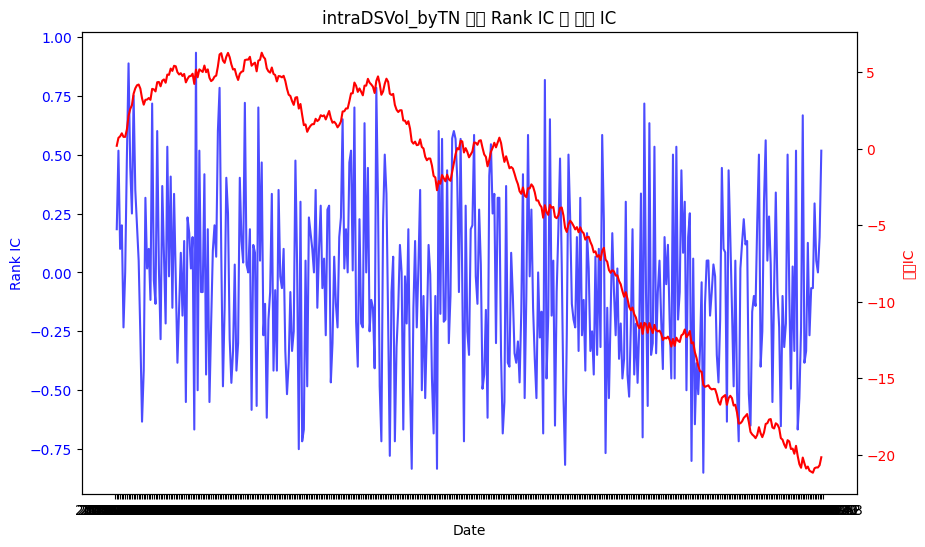

/Users/zhangrui/opt/anaconda3/envs/suishi/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20928 (\N{CJK UNIFIED IDEOGRAPH-51C0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/zhangrui/opt/anaconda3/envs/suishi/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/zhangrui/opt/anaconda3/envs/suishi/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22810 (\N{CJK UNIFIED IDEOGRAPH-591A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/zhangrui/opt/anaconda3/envs/suishi/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31354 (\N{CJK UNIFIED IDEOGRAPH-7A7A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/zhangrui/opt/anaconda3/envs/suishi/lib/python3.8/site-packages/IPython/core/p

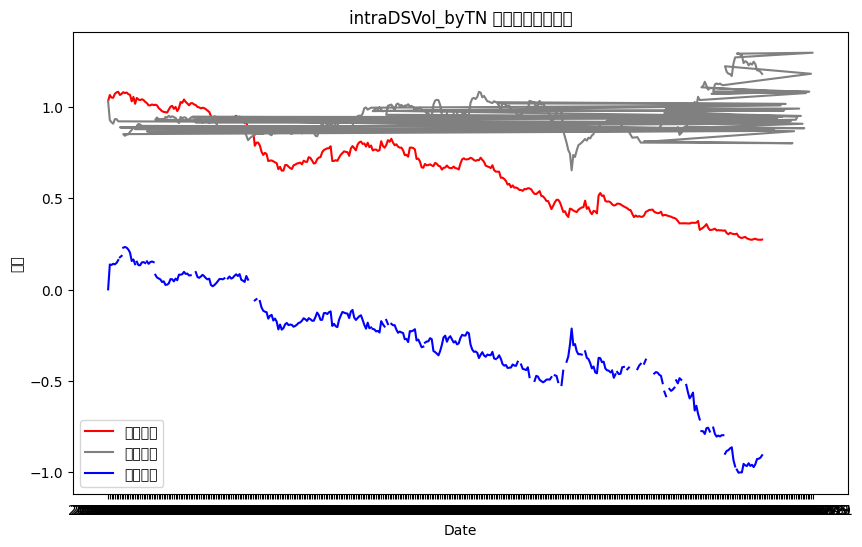

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 假设 merged_data 已经包含 'intraDSVol_byTN' 和 'daily_return' 列

# 1. 计算 Rank IC 和 累计 IC
rank_ic = merged_data.groupby('day').apply(lambda x: x['intraDSVol_byTN'].corr(x['daily_return'], method='spearman'))
cumulative_ic = rank_ic.cumsum()

# 2. 计算多空组合净值
# 根据因子的分位数构建多头（70%分位）和空头（30%分位）组合
long_stocks = merged_data[merged_data['intraDSVol_byTN'] >= merged_data['intraDSVol_byTN'].quantile(0.7)]
short_stocks = merged_data[merged_data['intraDSVol_byTN'] <= merged_data['intraDSVol_byTN'].quantile(0.3)]

# 计算多头和空头组合的日度收益率
long_daily_return = long_stocks.groupby('day')['daily_return'].mean()
short_daily_return = short_stocks.groupby('day')['daily_return'].mean()

# 计算多头和空头的累积收益率
long_cumulative_return = (1 + long_daily_return).cumprod()
short_cumulative_return = (1 + short_daily_return).cumprod()

# 计算多空净值
long_short_return = long_cumulative_return - short_cumulative_return

# 3. 绘制图表
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))

# 图1 - Rank IC 和 累计 IC
ax1.plot(rank_ic.index, rank_ic.values, label='IC', color='blue', alpha=0.7)
ax1.set_xlabel('Date')
ax1.set_ylabel('Rank IC', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(cumulative_ic.index, cumulative_ic.values, label='累计IC', color='red')
ax2.set_ylabel('累计IC', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('intraDSVol_byTN 因子 Rank IC 和 累计 IC')
plt.show()

# 图2 - 多空组合净值
plt.figure(figsize=(10, 6))
plt.plot(long_cumulative_return.index, long_cumulative_return.values, label='多头净值', color='red')
plt.plot(short_cumulative_return.index, short_cumulative_return.values, label='空头净值', color='gray')
plt.plot(long_short_return.index, long_short_return.values, label='多空净值', color='blue')
plt.xlabel('Date')
plt.ylabel('净值')
plt.title('intraDSVol_byTN 因子多空组合净值')
plt.legend()
plt.show()

### 4.6

/Users/zhangrui/opt/anaconda3/envs/suishi/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/zhangrui/opt/anaconda3/envs/suishi/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24207 (\N{CJK UNIFIED IDEOGRAPH-5E8F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/zhangrui/opt/anaconda3/envs/suishi/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/zhangrui/opt/anaconda3/envs/suishi/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/zhangrui/opt/anaconda3/envs/suishi/lib/python3.8/site-packages/IPython/core/p

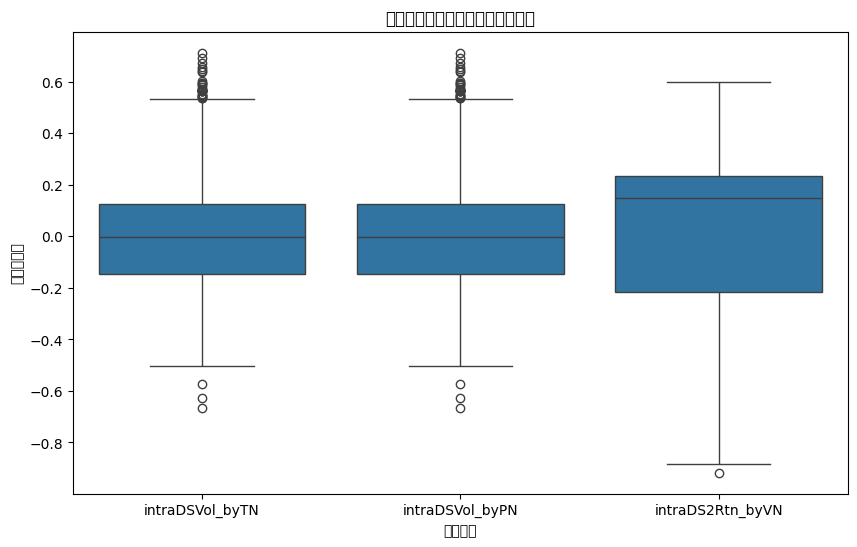

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 选择需要绘制的因子列
# 根据你提供的 merged_data 列，我们使用 'intraDSVol_byTN', 'intraDSVol_byPN', 'intraDS2Rtn_byVN'
factor_columns = ['intraDSVol_byTN', 'intraDSVol_byPN', 'intraDS2Rtn_byVN']

# 确保所有列都在 merged_data 中，并且删除包含 NaN 的数据
df_filtered = merged_data[factor_columns].dropna()

# 将数据整理为长格式，方便 seaborn 绘制箱形图
df_long = pd.melt(df_filtered, var_name='Factor', value_name='Value')

# 设置图形大小
plt.figure(figsize=(10, 6))

# 使用 seaborn 绘制箱形图
sns.boxplot(x='Factor', y='Value', data=df_long)

# 设置标题和标签
plt.title('同伴显著性因子时序相关性箱形图')
plt.ylabel('时序相关性')
plt.xlabel('因子名称')

# 显示图形
plt.show()